# Bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path
from datetime import date
from datetime import timedelta

# Funções

In [2]:
def droparDup(dataframe):
    dataframe.drop_duplicates(subset=['id'], inplace=True)

In [3]:
def formatarData(dataframe, coluna_data):
    dataframe[coluna_data] = pd.to_datetime(dataframe[coluna_data], format="%Y-%m-%d", errors = 'coerce')

In [4]:
def filtrarDatas(dataframe, data_inicial, data_final):
    filtro_dados = (dataframe["date"] >  data_inicial) & (dataframe["date"] < data_final)
    #print(dataframe[filtro_dados])
    return dataframe[filtro_dados].shape[0]

# Lê o arquivo com o nome das séries

**Lê o arquivo de entrada e puxa o nome das séries que quer analisar**

Obs: Já formata a coluna de data para o tipo correto

In [5]:
nomes_series = pd.read_csv('input_twitter_analysis.csv')
formatarData(nomes_series, 'data_estreia')
print(nomes_series['data_estreia'].dtypes)
nomes_series

datetime64[ns]


,nome,data_estreia
0,House of Cards_TESTE,2013-02-01
1,Jessica Jones,2015-11-20
2,Dark,2017-12-01
3,Julie and the Phantoms,2020-09-10


# Lê o .csv com os Twitters da respectiva série

**Gera uma lista de dataframes**

lista_df[0] = df da série 1

lista_df[1] = df da série 2

lista_df[2] = df da série 3

lista_df[3] = df da série 4

.....

In [6]:
lista_df = []
for index, linha in nomes_series.iterrows():

    #row = []
    df_serie = pd.read_csv(f"series_dataset_completo/{linha['nome']}.csv")

    droparDup(df_serie)
    formatarData(df_serie, 'date')
    
    lista_df.append(df_serie)
    

D:\Programas\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (0,1,21,22) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
D:\Programas\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (0,1,2,3,4,7,8,9,10,11,12,13,14,18,19,20,21,22,24,31) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
D:\Programas\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Funções

In [7]:
def countByDate(dataframe, coluna):
    lista_data = []
    lista_quantidade = []
    
    #print(f"{dataframe[coluna]}")
    
    for i in range( len(dataframe[coluna].value_counts()) ):
        
        lista_data.append( dataframe[coluna].value_counts().index.tolist()[i] )
        lista_quantidade.append( dataframe[coluna].value_counts()[i] )
        
    return lista_data, lista_quantidade

In [8]:
def filtrarDatas(dataframe, data_inicial, data_final):
    filtro_dados = (dataframe["date"] >  data_inicial) & (dataframe["date"] < data_final)
    #print(dataframe[filtro_dados])
    
    return countByDate( dataframe[filtro_dados] , 'date' )

In [9]:
def sepPre(dataframe, data_estreia):
    data_final = data_estreia - pd.DateOffset(days=3)
    data_inicial = data_estreia - pd.DateOffset(days=76)
    #print(f"Count Pre: Final: {data_final}, Inicial: {data_inicial}")
    
    return filtrarDatas(dataframe, data_inicial, data_final)

In [10]:
def sepDurante(dataframe, data_estreia):
    data_final = data_estreia + pd.DateOffset(days=4)
    data_inicial = data_estreia - pd.DateOffset(days=4)
    #print(f"Count Durante: Final: {data_final}, Inicial: {data_inicial}")
    
    return filtrarDatas(dataframe, data_inicial, data_final)

In [11]:
def sepPos(dataframe, data_estreia):
    data_final = data_estreia + pd.DateOffset(days=151)
    data_inicial = data_estreia + pd.DateOffset(days=3)
    #print(f"Count Pos: Final: {data_final}, Inicial: {data_inicial}")
    
    return filtrarDatas(dataframe, data_inicial, data_final)

# Separa as séries em períodos - Pré, Durante e Pós e gera um novo df para plot

In [12]:
lista_df_plot = []
i = 0
for df in lista_df:

    lista_pre_data = []
    lista_pre_qtd = []
    list_durante_data = []
    lista_durante_qtd = []
    list_pos_data =  []
    lista_pos_qtd = []    
    
    lista_pre_data, lista_pre_qtd = sepPre(df, nomes_series['data_estreia'][i])
    lista_durante_data, lista_durante_qtd = sepDurante(df, nomes_series['data_estreia'][i])
    lista_pos_data, lista_pos_qtd = sepPos(df, nomes_series['data_estreia'][i])

    df_pre = pd.DataFrame(list(zip(lista_pre_data,lista_pre_qtd)), columns = ['data','quantidade'])
    df_pre['Tipo'] = 'Pré'

    df_durante = pd.DataFrame(list(zip(lista_durante_data,lista_durante_qtd)), columns = ['data','quantidade'])
    df_durante['Tipo'] = 'Durante'
    
    df_pos = pd.DataFrame(list(zip(lista_pos_data,lista_pos_qtd)), columns = ['data','quantidade'])
    df_pos['Tipo'] = 'Pós'

    lista_df_plot.append( pd.concat([df_pre, df_durante, df_pos]).reset_index(level=0) )
    
    i += 1

# Plot

## Plot 2 x 2

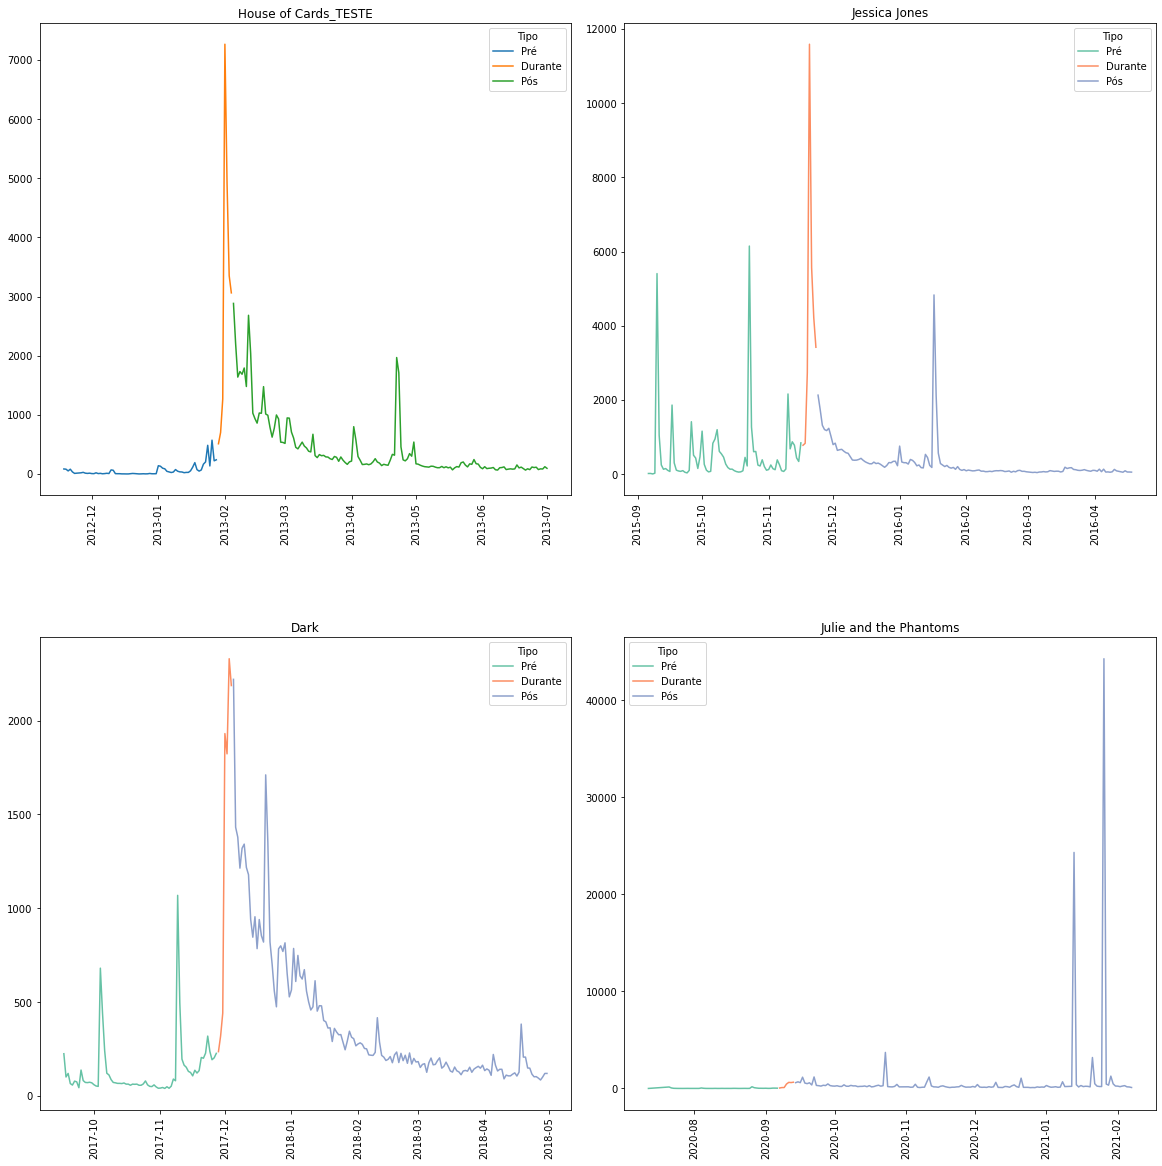

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(20,20), sharey=False)
fig.suptitle('', fontsize = 20)
plt.subplots_adjust(hspace = .3, wspace = 0.1)

x0 = 'data'
y0 = 'quantidade'

x1 = x2 = x3 = x0
y1 = y2 = y3 = y0

sns.lineplot(ax=axes[0,0], data = lista_df_plot[0], x=x0, y=y0, hue = 'Tipo')
sns.set_palette('Set2')
sns.lineplot(ax=axes[0,1], data = lista_df_plot[1], x=x1, y=y1, hue = 'Tipo')
sns.set_palette('Set2')
sns.lineplot(ax=axes[1,0], data = lista_df_plot[2], x=x2, y=y2, hue = 'Tipo')
sns.set_palette('Set2')
sns.lineplot(ax=axes[1,1], data = lista_df_plot[3], x=x3, y=y3, hue = 'Tipo')
sns.set_palette('Set2')

rx = 90
axes[0,0].set(xlabel=None, ylabel=None, title=nomes_series['nome'][0])
axes[0,0].tick_params(axis='x', rotation=rx)

axes[0,1].set(xlabel=None, ylabel=None, title=nomes_series['nome'][1])
axes[0,1].tick_params(axis='x', rotation=rx)

axes[1,0].set(xlabel=None, ylabel=None, title=nomes_series['nome'][2])
axes[1,0].tick_params(axis='x', rotation=rx)

axes[1,1].set(xlabel=None, ylabel=None, title=nomes_series['nome'][3])
axes[1,1].tick_params(axis='x', rotation=rx)
